# Introdução a Ciência de Dados
## Projeto 1

### Lua Nardi Quito (11371270)

### 1.

In [1]:
import random # gerador de números aleatórios
random.seed(1) # inicia a semente do gerador de números aleatórios
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('data/iris-with-errors.csv', header=(0))
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [2]:
# remover as linhas com NaN
data = data.dropna()
# Remover as linhas duplicadas
data = data.drop_duplicates()
#para remover as ''?''
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
# Remove as linhas com Nan
data = data.dropna()
# Remove as 2 ultimas COLUNAS 
data = data.drop(data.columns[[3, 4]], axis=1)
data.head(25)

,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


### 2.

In [3]:
import statistics #pra calcular a mediana
df = pd.read_csv('data/iris-with-errors.csv', header=(0))
df = df.replace('?', np.nan)
# convertemos para o formato Numpy e ignoramos a última coluna 
X = np.array(df[df.columns[0:df.shape[1]-1]], dtype = float) 
# calculamos a mediana de cada atributo e armazenamos em uma lista
y = df.median()
L = []
for i in y:
    L.append(i)
#substituir NaN pela mediana de cada coluna
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = L[j] # insere a mediana
print(X)

[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.45 1.7  0.3 ]
 [5.05 3.8  1.5  0.3 ]]


### 3.

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
iris = pd.read_csv('data/iris.csv', header=(0))	
import numpy as np
from sklearn.preprocessing import MinMaxScaler
X = np.array(iris[iris.columns[0:iris.shape[1]-1]])
scaler = MinMaxScaler(feature_range=(0, 1))
X_norm = scaler.fit_transform(X)
#dados normalizados

In [5]:
#agora com os dados padronizados
from sklearn.preprocessing import StandardScaler
Y = np.array(iris[iris.columns[0:iris.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(Y)
# realiza a padronização (média=0, variância = 1)
rescaledY = scaler.transform(Y)

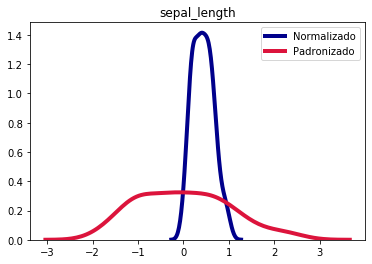

In [6]:
sns.distplot(X_norm[:, 0], hist=False, kde=True, 
             color = 'darkblue',
             label='Normalizado',
             kde_kws={'linewidth': 4})
sns.distplot(rescaledY[:, 0], hist=False, kde=True, 
             color = 'crimson',
             label='Padronizado',
             kde_kws={'linewidth': 4})
plt.title('sepal_length')
#density plot (aproximado da distribuicao de probabilidade)
#plotando a variavel padronizada e normalizada no mesmo grafico
plt.legend()

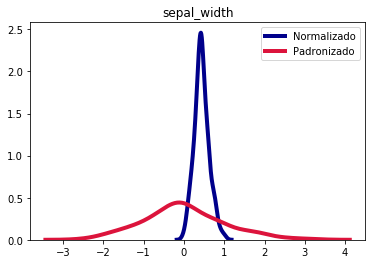

In [7]:
sns.distplot(X_norm[:, 1], hist=False, kde=True, 
             color = 'darkblue',
             label='Normalizado',
             kde_kws={'linewidth': 4})
sns.distplot(rescaledY[:, 1], hist=False, kde=True, 
             color = 'crimson',
             label='Padronizado',
             kde_kws={'linewidth': 4})
plt.title('sepal_width')
plt.legend()

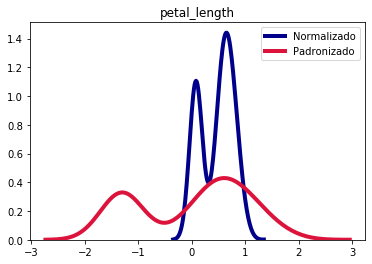

In [8]:
sns.distplot(X_norm[:, 2], hist=False, kde=True, 
             color = 'darkblue',
             label='Normalizado',
             kde_kws={'linewidth': 4})
sns.distplot(rescaledY[:, 2], hist=False, kde=True, 
             color = 'crimson',
             label='Padronizado',
             kde_kws={'linewidth': 4})
plt.title('petal_length')
plt.legend()

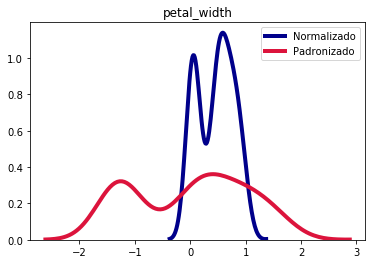

In [9]:
sns.distplot(X_norm[:, 3], hist=False, kde=True, 
             color = 'darkblue',
             label='Normalizado',
             kde_kws={'linewidth': 4})
sns.distplot(rescaledY[:, 3], hist=False, kde=True, 
             color = 'crimson',
             label='Padronizado',
             kde_kws={'linewidth': 4})
plt.title('petal_width')
plt.legend()

### 4.

In [10]:
#amostrar 10 elementos de cada classe da base iris
iris = pd.read_csv('data/iris.csv', header=(0))	
classes = iris[iris.columns[-1]]
N = 10
cl = np.unique(classes)
X = np.array(iris)
Xnew = []
cls = np.array(iris[iris.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('amostrando 10 elementos aleatorios de cada classe')
print(Xnew)

amostrando 10 elementos aleatorios de cada classe
[[[5.0 3.5 1.6 0.6 'setosa']
  [4.8 3.1 1.6 0.2 'setosa']
  [5.5 4.2 1.4 0.2 'setosa']
  [4.8 3.4 1.9 0.2 'setosa']
  [5.0 3.4 1.5 0.2 'setosa']
  [5.1 3.8 1.9 0.4 'setosa']
  [4.8 3.0 1.4 0.3 'setosa']
  [4.4 3.2 1.3 0.2 'setosa']
  [5.1 3.8 1.6 0.2 'setosa']
  [4.9 3.1 1.5 0.1 'setosa']]

 [[7.0 3.2 4.7 1.4 'versicolor']
  [5.0 2.0 3.5 1.0 'versicolor']
  [5.5 2.4 3.8 1.1 'versicolor']
  [5.5 2.4 3.7 1.0 'versicolor']
  [5.5 2.3 4.0 1.3 'versicolor']
  [6.4 3.2 4.5 1.5 'versicolor']
  [5.6 2.7 4.2 1.3 'versicolor']
  [5.6 3.0 4.5 1.5 'versicolor']
  [6.9 3.1 4.9 1.5 'versicolor']
  [6.1 3.0 4.6 1.4 'versicolor']]

 [[7.6 3.0 6.6 2.1 'virginica']
  [6.0 3.0 4.8 1.8 'virginica']
  [6.7 3.3 5.7 2.5 'virginica']
  [5.6 2.8 4.9 2.0 'virginica']
  [4.9 2.5 4.5 1.7 'virginica']
  [6.4 2.8 5.6 2.1 'virginica']
  [6.2 3.4 5.4 2.3 'virginica']
  [5.8 2.7 5.1 1.9 'virginica']
  [6.3 3.4 5.6 2.4 'virginica']
  [6.3 2.5 5.0 1.9 'virginica']]]


### 5.

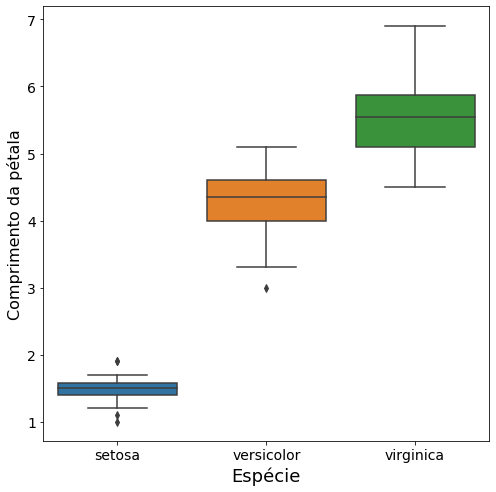

In [11]:
#montar um boxplot para cada uma das variaveis da iris (com a especie no eixo Y)
data = pd.read_csv('data/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
sns.boxplot(x="species", y="petal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

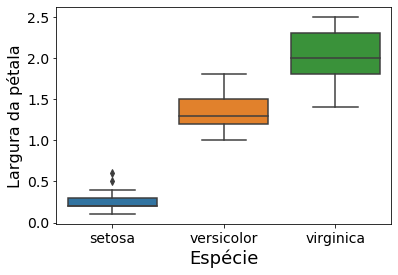

In [12]:
#fazer o mesmo para as outras variaveis
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

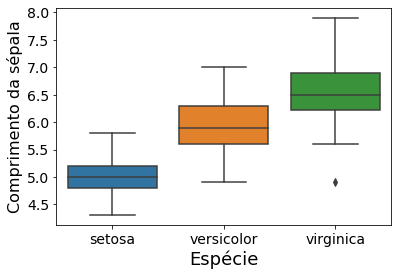

In [13]:
sns.boxplot(x="species", y="sepal_length", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

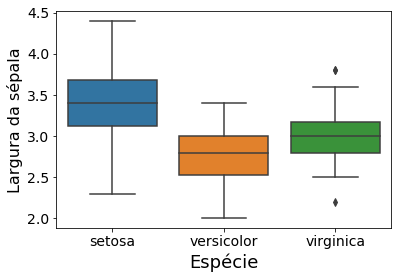

In [14]:
sns.boxplot(x="species", y="sepal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Largura da sépala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

### 6.

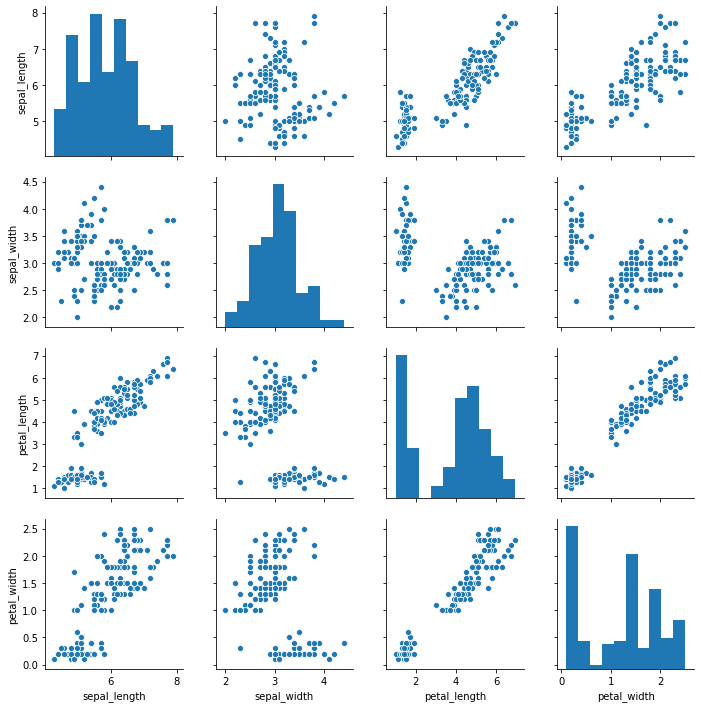

In [15]:
#vamos identificar e remover os outliers nos dados iris e bostonhousing
Data = pd.read_csv('data/iris.csv', header=(0))
sns.pairplot(Data)
plt.show()
#essa funcao mostra o histograma (distribuicao) de cada variavel na diagonal e tambem sua relacao com as outras 
#variaveis (scatterplot) 

In [16]:
#identificar os outliers
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

print (((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))))

     petal_length  petal_width  sepal_length  sepal_width  species
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
5           False        False         False        False    False
6           False        False         False        False    False
7           False        False         False        False    False
8           False        False         False        False    False
9           False        False         False        False    False
10          False        False         False        False    False
11          False        False         False        False    False
12          False        False         False        False    False
13          False        False         False        False    F

In [17]:
#os que deram true sao valores outliers
print (((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).any(axis=1))

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
120    False
121    False
122    False
123    False
124    False
125    False
126    False
127    False
128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [18]:
v = ((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).any(axis=1)
Data = Data.drop(Data.index[list(v)], axis=0)
Data.head(25)
#podemos ver que a entrada de numero 15 foi removida, por exemplo

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


os outliers tambem podem ser visualizados nos boxplots do exercicio 5, ja que eles aparecem fora do boxplot em si

In [19]:
#vamos fazer o mesmo para a base bostonhousing
bh = pd.read_csv('data/BostonHousing.csv', header=(0))
bh.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [20]:
Q1 = bh.quantile(0.25)
Q3 = bh.quantile(0.75)
IQR = Q3 - Q1
print (((bh < (Q1 - 1.5 * IQR)) | (bh > (Q3 + 1.5 * IQR))).any(axis=1))

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18      True
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26     False
27      True
28     False
29     False
       ...  
476    False
477     True
478     True
479     True
480    False
481    False
482    False
483    False
484    False
485    False
486    False
487    False
488    False
489     True
490     True
491    False
492    False
493    False
494    False
495    False
496    False
497    False
498    False
499    False
500    False
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


In [21]:
v = ((bh < (Q1 - 1.5 * IQR)) | (bh > (Q3 + 1.5 * IQR))).any(axis=1)
bh = bh.drop(bh.index[list(v)], axis=0)
bh.head(25)
#podemos ver que as entradas que continham outlier foram removidas (e.g. 18)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
